# Regression example: predict SALES

0.8000065560383726


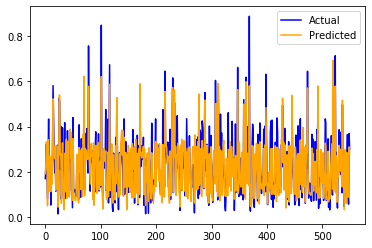

In [1]:
#imports
import pandas as pd
from sklearn import linear_model
from sklearn import model_selection
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler 
from matplotlib import pyplot as plt
import numpy as np

#load dataset
df = pd.read_csv("cleaned_data.csv")
#split the dataframe X - predictors and y - target
X = df.drop('SALES', axis=1)
y = df['SALES']
#split dataset into test/train 
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.20, random_state=20) 
#create network
predictors = len(X.columns)
clf = MLPRegressor(solver='adam', alpha=0.0001, activation = 'relu',
                   hidden_layer_sizes=(int((predictors +1)*(2/3)* predictors),int(predictors/2),), 
                   random_state=1)

clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
print(clf.score(X_test, y_test))

fig, ax = plt.subplots()
ax.plot(y_test.to_numpy(), color = 'blue')
ax.plot(predictions, color = 'orange')
ax.legend(['Actual', 'Predicted'])
plt.show()

# Classification example: Classify DEALSIZE

In [2]:
#classify DEALSIZE
from sklearn.neural_network import MLPClassifier
df = pd.read_csv("dummies.csv")
print(df['DEALSIZE'].unique())
X = df.drop('DEALSIZE', axis=1)
y = df['DEALSIZE']
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.20, random_state=20) 

#create network
predictors = len(X.columns)
clf = MLPClassifier(solver='adam', alpha=0.0001, activation = 'relu',
                   hidden_layer_sizes=(int((predictors +1)*(2/3)* predictors),int(predictors/2),), 
                   random_state=1)

clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
print(clf.score(X_test, y_test))

from matplotlib import pyplot as plt
import numpy as np
df_p = pd.DataFrame()
df_p['Actual'] = y_test
df_p['Predicted'] = predictions
df_p.head()

[0 1 2]
0.9254545454545454


,Actual,Predicted
766,0,0
1050,1,1
255,1,1
826,1,1
1730,0,0


## Confusion matrix

In [3]:
#show the confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions, labels=[0,1,2]) #'Small','Medium','Large'

array([[232,  11,   0],
       [  0, 277,   0],
       [  0,  30,   0]])

In [4]:
#stratify the sample to get a better training set and see how it improves the accuracy  
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.20, random_state=20, stratify=y)
clf = MLPClassifier(solver='adam', alpha=0.0001, activation = 'relu',
                   hidden_layer_sizes=(int((predictors +1)*(2/3)* predictors),int(predictors/2),), 
                   random_state=1)

clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
print(clf.score(X_test, y_test))

0.9690909090909091


training: (50000, 32, 32, 3) (50000, 1)
testing: (10000, 32, 32, 3) (10000, 1)


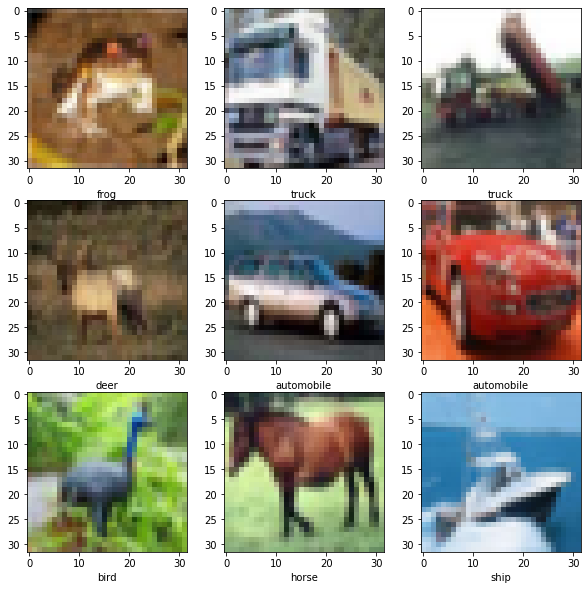

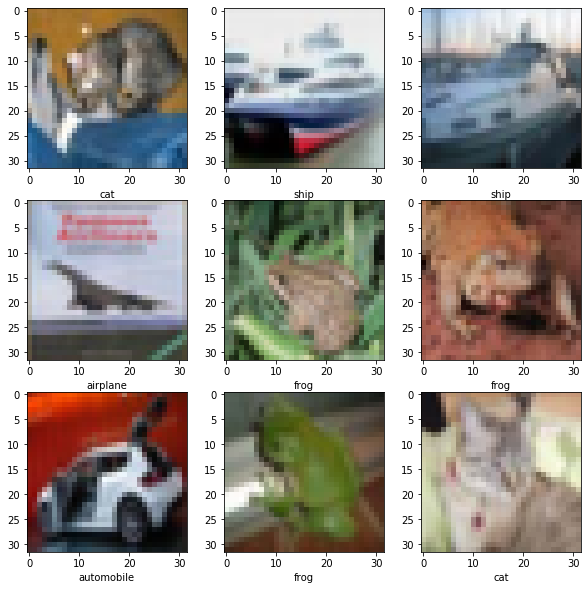

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        2432      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________

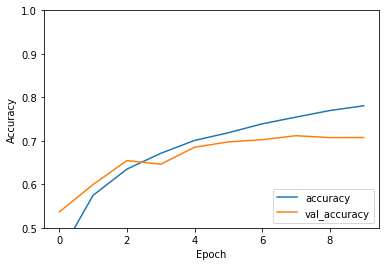

In [5]:
#CNN
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten
from tensorflow.keras import datasets, models
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt

#load data
(train_X, train_Y), (test_X, test_Y) = datasets.cifar10.load_data()

#show shape of training and testing sets
print('training:', train_X.shape, train_Y.shape) 
#training: (50000, 32, 32, 3) (50000, 1) -> it means that there are 50000 images.
print('testing:', test_X.shape, test_Y.shape) 
#testing: (10000, 32, 32, 3) (10000, 1) -> -> it means that there are 10000 images.
#show some images from training and testing sets, print the class associeted with each image
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']
plt.figure(figsize=(10,10))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(train_X[i,:,:])
    plt.xlabel(classes[train_Y[i][0]])
plt.show()
plt.figure(figsize=(10,10))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[i,:,:])
    plt.xlabel(classes[test_Y[i][0]])
plt.show()

#scale data
#pixels values are between 0 and 255 -> divide by 255 to scale data between 0 and 1
train_X = train_X / 255
test_X = test_X / 255

#create output layer with n nodes and softmax function, (n=#classes). 
output_layer = Dense(len(classes), activation='softmax')

#create the model
#use stack of convolutional layer 2d and pooling layer 
#Normally the pattern: 
#[CONV->ReLU->Pool->CONV->ReLU->Pool->FC->Softmax_loss(during train)] is quite commom.
model = models.Sequential()
model.add(Conv2D(32, (5, 5), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))
print(model.summary())
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_X, train_Y, epochs=10, 
                    validation_data=(test_X, test_Y))
plt.plot(history.history['acc'], label='accuracy')
plt.plot(history.history['val_acc'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
loss, acc = model.evaluate(test_X,  test_Y, verbose=0)
print(acc)